### Assault011 -> 12초부터 Anomaly 잘 잡음, 원본: 1분 16초
### Explosion088 -> 32초부터 Anomaly 잘 잡음, 원본: 58초 

### Shooting002 -> 33초부터 Anomaly 잘 잡음

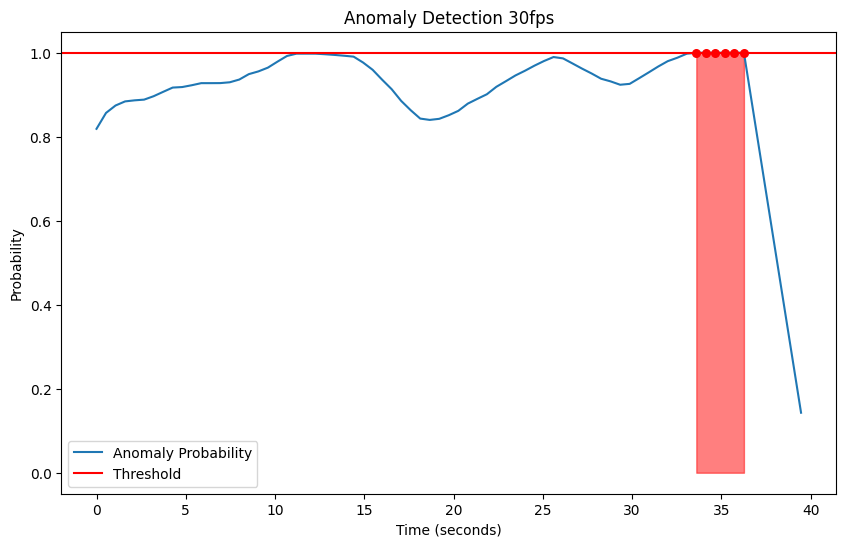

In [48]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

res = np.load('./output/Shooting002_wBestThresh_pred.npy')
pred = res[:-1]
best_thres = res[-1]
fps = 30
gt = np.load('./list/ucf/single_gt/Shooting002_x264__9_gt.npy')[::16]

# 각 인덱스를 시간(초)으로 변환 (30fps 기준)
time_in_seconds = np.arange(len(pred)) * 16 / fps

plt.figure(figsize=(10, 6))
plt.plot(time_in_seconds, pred, label='Anomaly Probability')
plt.axhline(y=best_thres, color='r', linestyle='-', label='Threshold')
plt.title(f'Anomaly Detection {fps}fps')
plt.xlabel('Time (seconds)')
plt.ylabel('Probability')
plt.legend()

# 위험 부분의 영역 색칠
plt.fill_between(time_in_seconds, pred, where=(pred >= best_thres), color='red', alpha=0.5)

# 위험 부분에 빨간색 점 추가
plt.scatter(time_in_seconds[pred >= best_thres], pred[pred >= best_thres], color='red', s=30, zorder=3)

plt.show()


In [5]:
pred.shape

(109,)

## 스르륵 움직이는 버전

KeyboardInterrupt: 

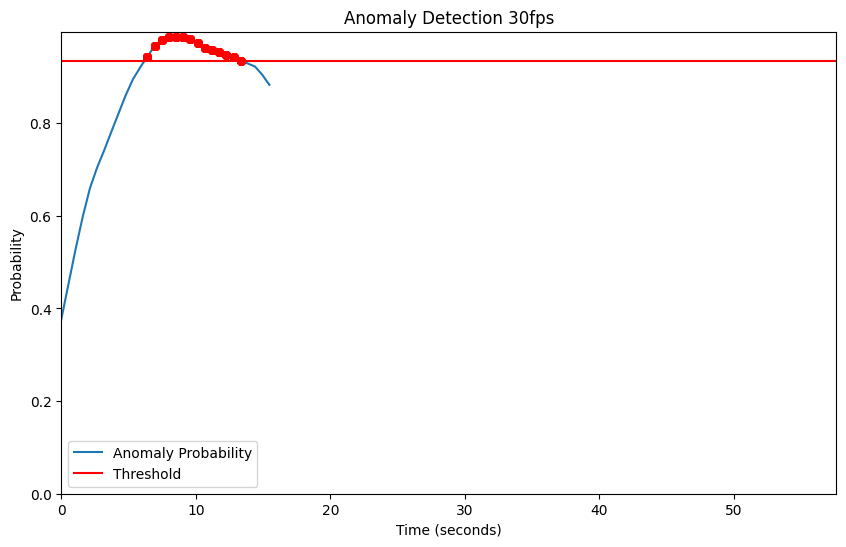

In [44]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

res = np.load('./output/Explosion008_wBestThresh_pred.npy')
pred = res[:-1]
best_thres = res[-1]
fps = 30
gt = np.load('./list/ucf/single_gt/Explosion008_x264__9_gt.npy')[::16]

time_in_seconds = np.arange(len(pred)) * 16 / fps

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], label='Anomaly Probability')
ax.set_xlim(0, np.max(time_in_seconds))
ax.set_ylim(0, np.max(pred))
ax.axhline(y=best_thres, color='r', linestyle='-', label='Threshold')
ax.set_title(f'Anomaly Detection {fps}fps')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Probability')
ax.legend()


def init():
    line.set_data([], [])
    return line,


def update(frame):
    x = time_in_seconds[:frame]
    y = pred[:frame]
    line.set_data(x, y)
    
    if frame >= 1:
        a = time_in_seconds[pred >= best_thres]
        b = pred[pred >= best_thres]
        c = a <= x[-1]
        
        ax.scatter(a[c], b[c], color='red', s=30, zorder=3)
    return line,

ani = FuncAnimation(fig, update, frames=len(time_in_seconds), init_func=init, blit=True, interval=(1000/fps)*16)

from IPython.display import HTML
HTML(ani.to_html5_video())


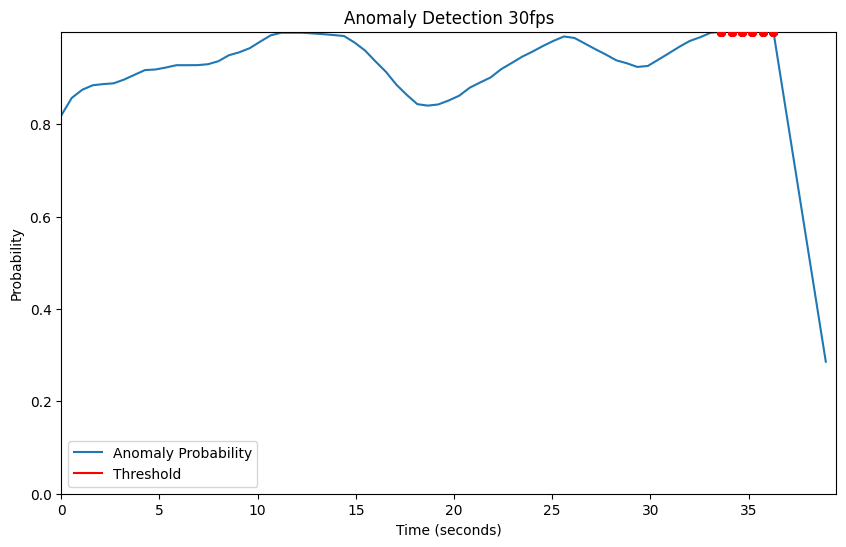

In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

res = np.load('./output/Shooting002_wBestThresh_pred.npy')
pred = res[:-1]
best_thres = res[-1]
fps = 30
gt = np.load('./list/ucf/single_gt/Shooting002_x264__9_gt.npy')[::16]

time_in_seconds = np.arange(len(pred)) * 16 / fps

fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], label='Anomaly Probability')
threshold_line, = ax.plot([], [], color='r', linestyle='-', label='Threshold')
ax.set_xlim(0, np.max(time_in_seconds))
ax.set_ylim(0, np.max(pred))
ax.set_title(f'Anomaly Detection {fps}fps')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Probability')
ax.legend()

def init():
    line.set_data([], [])
    threshold_line.set_data([], [])
    return line, threshold_line

def update(frame):
    x = time_in_seconds[:frame]
    y = pred[:frame]
    line.set_data(x, y)

    # 임계값 선을 점차적으로 그립니다.
    threshold_line.set_data(time_in_seconds[:frame], [best_thres] * len(x))
    
    if frame >= 1:
        a = time_in_seconds[pred >= best_thres]
        b = pred[pred >= best_thres]
        c = a <= x[-1]
        
        ax.scatter(a[c], b[c], color='red', s=30, zorder=3)
    return line, threshold_line

ani = FuncAnimation(fig, update, init_func=init, frames=len(time_in_seconds), blit=True, interval=(1000/fps)*16)

from IPython.display import HTML
HTML(ani.to_html5_video())


In [37]:
a = np.array([])
a[-1]

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1697032300.py, line 1)